In [1]:
import tensorflow_hub as hub
import tensorflow as tf

# Tải mô hình ELMo từ TensorFlow Hub
elmo = hub.load("https://tfhub.dev/google/elmo/3")

# Ví dụ một danh sách câu đầu vào
sentences = ["Hello, how are you?", "I am learning ELMo embeddings."]

# Chạy mô hình để lấy embedding
elmo_embeddings = elmo(sentences)["elmo"]

# Kiểm tra kích thước output
print(elmo_embeddings.shape)  # (batch_size, num_words, 1024)


TypeError: 'AutoTrackable' object is not callable

In [2]:


# Nhận embedding từ mô hình ELMo
elmo_embeddings = elmo.signatures["default"](tf.constant(sentences))["elmo"]

# Kiểm tra kích thước output
print(elmo_embeddings.shape)  # (batch_size, num_words, 1024)


(2, 5, 1024)


In [3]:
elmo_embeddings

<tf.Tensor: shape=(2, 5, 1024), dtype=float32, numpy=
array([[[-4.7632897e-01, -7.9470170e-01, -3.5256314e-01, ...,
         -5.7223099e-01, -9.3166381e-02,  6.5635037e-01],
        [ 3.7798768e-01, -1.6698724e-01, -2.6257035e-01, ...,
         -4.5967102e-04, -5.3236697e-02,  2.6682174e-01],
        [ 5.7260823e-01,  1.5474656e-01, -7.4906838e-01, ...,
         -1.8167332e-01,  4.9392146e-01, -1.3859104e-02],
        [ 3.2980028e-01, -5.0265007e-03,  1.1283764e-01, ...,
         -9.2652440e-02,  1.5207240e-01,  1.5980369e-01],
        [-2.8408401e-02, -4.3532163e-02,  4.1301612e-02, ...,
          2.5831675e-02, -1.4298360e-02, -1.6504226e-02]],

       [[-1.2254356e+00, -5.6004167e-01, -1.7601360e-01, ...,
         -3.1825137e-01, -2.0987931e-01, -1.3609272e-01],
        [-4.6348959e-01, -6.8759954e-01, -4.3287843e-01, ...,
          5.8103651e-01,  2.4382532e-01, -2.5460082e-01],
        [ 5.9944421e-02, -4.2462021e-01, -1.8064938e-01, ...,
          2.0934993e-01, -5.6416756e-01, -

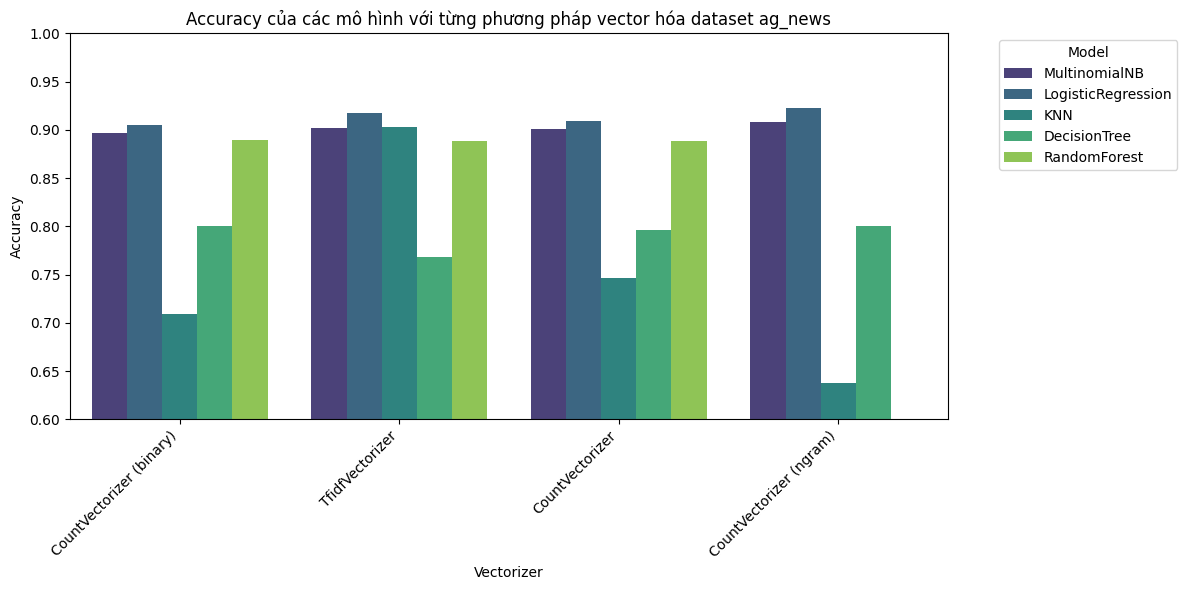

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dữ liệu
data = [
    ("CountVectorizer (binary)", "MultinomialNB", 0.8963),
    ("TfidfVectorizer", "MultinomialNB", 0.9021),
    ("CountVectorizer", "MultinomialNB", 0.9009),
    ("CountVectorizer (ngram)", "MultinomialNB", 0.9084),
    ("TfidfVectorizer", "LogisticRegression", 0.9180),
    ("CountVectorizer (binary)", "LogisticRegression", 0.9054),
    ("CountVectorizer", "LogisticRegression", 0.9088),
    ("TfidfVectorizer", "KNN", 0.9025),
    ("CountVectorizer (binary)", "KNN", 0.7097),
    ("CountVectorizer", "KNN", 0.7466),
    ("CountVectorizer (ngram)", "KNN", 0.6380),
    ("CountVectorizer (ngram)", "LogisticRegression", 0.9230),
    ("CountVectorizer (binary)", "DecisionTree", 0.8003),
    ("CountVectorizer", "DecisionTree", 0.7967),
    ("TfidfVectorizer", "DecisionTree", 0.7679),
    ("TfidfVectorizer", "RandomForest", 0.8889),
    ("CountVectorizer (ngram)", "DecisionTree", 0.8001),
    ("CountVectorizer", "RandomForest", 0.8887),
    ("CountVectorizer (binary)", "RandomForest", 0.8896),
]

# Chuyển dữ liệu thành DataFrame
df = pd.DataFrame(data, columns=["Vectorizer", "Model", "Accuracy"])

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Vectorizer", y="Accuracy", hue="Model", palette="viridis")

# Hiển thị nhãn trục x xoay ngang để dễ đọc
plt.xticks(rotation=45, ha="right")
plt.ylim(0.6, 1.0)
plt.title("Accuracy của các mô hình với từng phương pháp vector hóa dataset ag_news")
plt.xlabel("Vectorizer")
plt.ylabel("Accuracy")

# Hiển thị biểu đồ
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [2]:
from datasets import load_dataset



dataset = load_dataset("CogComp/trec",trust_remote_code=True)
# dataset = load_dataset("sh0416/ag_news")

dataset

Generating test split: 100%|██████████| 500/500 [00:00<00:00, 12027.78 examples/s]


DatasetDict({
    train: Dataset({
        features: ['text', 'coarse_label', 'fine_label'],
        num_rows: 5452
    })
    test: Dataset({
        features: ['text', 'coarse_label', 'fine_label'],
        num_rows: 500
    })
})

In [10]:
def combine_text(examples):
    examples["text"] = examples["title"] + " " + examples["description"]
    return examples

# Gộp title và description thành text
dataset = dataset.map(combine_text)
dataset

Map: 100%|██████████| 7600/7600 [00:00<00:00, 12442.19 examples/s]


DatasetDict({
    train: Dataset({
        features: ['label', 'title', 'description', 'text'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['label', 'title', 'description', 'text'],
        num_rows: 7600
    })
})

In [12]:
dataset.save_to_disk("ag_news_combined")

Saving the dataset (0/1 shards):   0%|          | 0/120000 [00:00<?, ? examples/s]

Saving the dataset (1/1 shards): 100%|██████████| 7600/7600 [00:00<00:00, 362812.55 examples/s]


In [9]:
dataset['train']['description'][0]

"Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."

In [ ]:
train_texts = dataset["train"]["text"]
train_labels = dataset["train"]["label"]
test_texts = dataset["test"]["text"]
test_labels = dataset["test"]["label"]

In [2]:
from datasets import load_dataset, load_from_disk
# dataset = load_from_disk("imdb_dataset")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
model_encoders=[CountVectorizer(),
                TfidfVectorizer(),
                CountVectorizer(ngram_range=(1,2)),
                CountVectorizer(binary=True)]


In [6]:
from sklearn.tree import DecisionTreeClassifier  # Nếu muốn dùng cây quyết định
from sklearn.ensemble import RandomForestClassifier  # Đúng cách
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
model_classifiers=[DecisionTreeClassifier(),
                     RandomForestClassifier(),
                     MultinomialNB(),
                     LogisticRegression(max_iter=500),
                    #  SVC(kernel='linear'),
                     KNeighborsClassifier()]
from sklearn.pipeline import make_pipeline

In [ ]:
from multiprocessing import Pool
from sklearn.pipeline import make_pipeline

# Giả sử các biến này đã được định nghĩa trước
# train_texts, train_labels, test_texts, test_labels
# model_encoders, model_classifiers

def train_and_evaluate(args):
    # args là một tuple chứa (encoder, classifier, train_texts, train_labels, test_texts, test_labels)
    encoder, classifier, train_texts, train_labels, test_texts, test_labels = args
    pipeline_cls = make_pipeline(encoder, classifier)
    pipeline_cls.fit(train_texts, train_labels)
    accuracy = pipeline_cls.score(test_texts, test_labels)
    print(f"Accuracy: {accuracy:.4f} using {encoder} and {classifier}")
    return (accuracy, encoder, classifier)  # Trả về cả encoder để dễ theo dõi

def run_parallel_training(model_encoders, model_classifiers, train_texts, train_labels, test_texts, test_labels):
    num_processes = 4  # Số tiến trình song song

    # Tạo danh sách tất cả các cặp (encoder, classifier) kèm dữ liệu
    tasks = [
        (encoder, clf, train_texts, train_labels, test_texts, test_labels)
        for encoder in model_encoders
        for clf in model_classifiers
    ]

    # Chạy song song một lần duy nhất với Pool
    with Pool(processes=num_processes) as pool:
        results = pool.map(train_and_evaluate, tasks)

    # Tổ chức lại kết quả
    encoderlist = {}
    for accuracy, encoder, classifier in results:
        if encoder not in encoderlist:
            encoderlist[encoder] = []
        encoderlist[encoder].append((accuracy, classifier))

    return encoderlist


# Ví dụ dữ liệu (thay bằng dữ liệu thực tế của bạn)

# Chạy song song
encoderlist = run_parallel_training(
    model_encoders, model_classifiers, train_texts, train_labels, test_texts, test_labels
)

# In kết quả
for encoder, clf_results in encoderlist.items():
    print(f"\nEncoder: {encoder}")
    for accuracy, classifier in clf_results:
        print(f"  Classifier: {classifier}, Accuracy: {accuracy:.4f}")


In [4]:
from multiprocessing import Process
import os

def worker():
    for i in range(10000000):  # Lặp quá lớn có thể làm chậm máy
        print(f"Worker: {i}")  
    print(f"Process ID: {os.getpid()}")

if __name__ == "__main__":  # Cần thiết trên Windows
    processes = []
    for _ in range(4):
        p = Process(target=worker)
        p.start()
        processes.append(p)

    for p in processes:
        p.join()
